In class, we discussed two different strategies for computing the Fibonacci sequence: directly with the recursive strategy, and recursive but modified using lru_cache. Implement both (yes, I know, I gave you implementations on the slides, but try to do this exercise from scratch as much as possible) (5 points), time them as functions of n (5 points), and display this in the way you think is best (5 points). Discuss your choices (e.g. why those n and why you're displaying it that way; 5 points) and your results (5 points).

In [47]:
import time
from tqdm import tqdm
import pandas as pd
from plotnine import *

In [26]:
def fib_seq(n): #recursive strategy
    if n in (1,2):
        return 1
    else:
        return fib_seq(n-1)+fib_seq(n-2)

In [27]:
[fib_seq(n) for n in range(1,17)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

In [36]:
#time recursive strategy
def fib_seq_time(n):
    time_recursive=[]
    for i in tqdm(range(n)):
        start=time.time()
        list=[fib_seq(n) for n in range(1,i)]
        end=time.time()
        time_recursive.append(end-start)
    return time_recursive

In [41]:
fib_seq_time=fib_seq_time(n=40)

100%|██████████| 40/40 [00:51<00:00,  1.28s/it] 


In [12]:
from functools import lru_cache

In [30]:
@lru_cache() #modified with lru_cache
def fib_seq_lru(n):
    if n in (1,2):
        return 1
    else:
        return fib_seq(n-1)+fib_seq(n-2)

In [31]:
[fib_seq_lru(n) for n in range(1,17)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

In [40]:
#time cache
def time_cache(n):
    time_cache=[]
    for j in tqdm(range(n)):
        start=time.time()
        list=[fib_seq_lru(n) for n in range(1,j)]
        end=time.time()
        time_cache.append(end-start)
    return time_cache

In [42]:
time_cache=time_cache(n=40)

100%|██████████| 40/40 [00:00<00:00, 10083.07it/s]


In [45]:
data=pd.DataFrame()
data['n']=[i for i in range(40)]*2
data['time']=fib_seq_time+time_cache
data['attributes']=['recursive']*40+['cache']*40

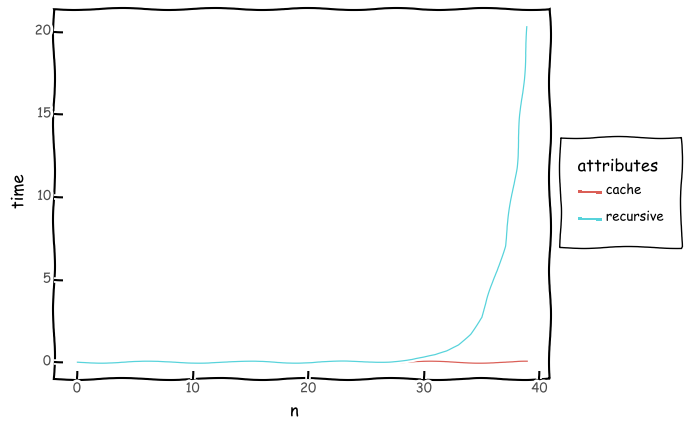

In [53]:
#display runtime differences as n increases in two strategies 
plot=(ggplot(data, aes(x='n', y='time',color = 'attributes'))
 +geom_line()
 +theme_xkcd()
)
print(plot)